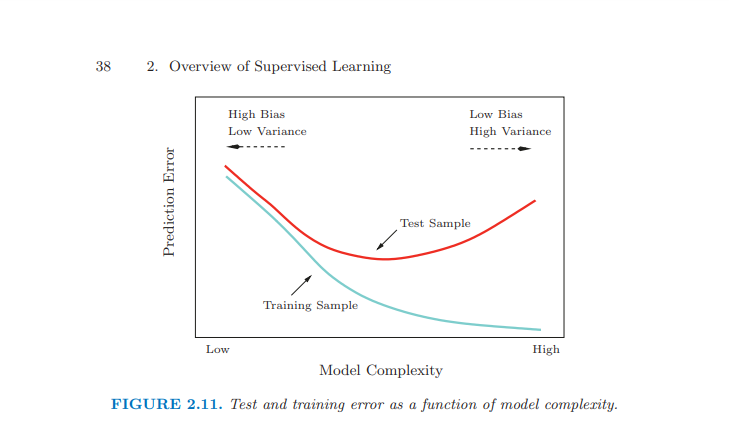

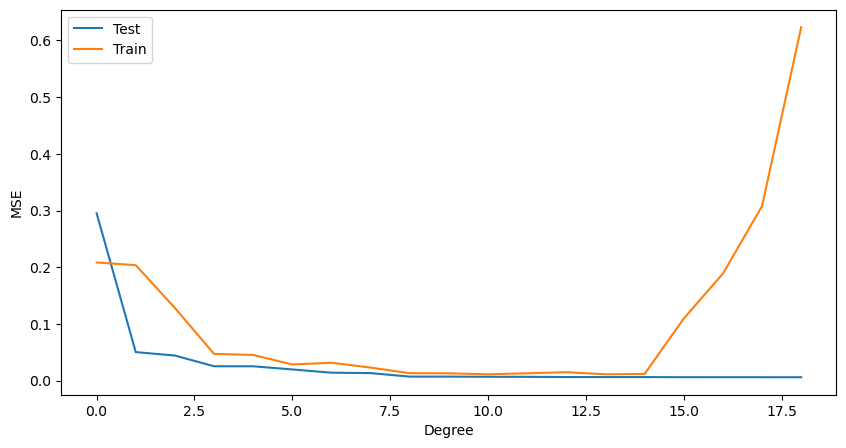

In [21]:
# Re-create this illustration from Hastie et.al
# some moc-up data.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error


np.random.seed(1)
degree = range(19)
n = 100
x = np.linspace(-3,3,n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1, x.shape)

X = x.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# some scaling.
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_scaler = np.mean(y_train)
y_train_scaled = y_train - y_scaler

mse_ols = []
mse_ols_test = []


for deg in degree:
  poly = PolynomialFeatures(degree=deg)
  X_train_poly = poly.fit_transform(X_train_scaled)
  X_test_poly = poly.transform(X_test_scaled.reshape(-1,1))

  beta_OLS = np.linalg.inv(X_train_poly.T @ X_train_poly) @ X_train_poly.T @ y_train_scaled
  y_pred_OLS = X_train_poly @ beta_OLS + y_scaler
  mse = mean_squared_error(y_train, y_pred_OLS)
  mse_ols.append(mse)

  y_pred_OLS_test = X_test_poly @ beta_OLS + y_scaler

  mse_ols_test.append( mean_squared_error(y_test, X_test_poly @ beta_OLS + y_scaler))


plt.figure(figsize=(10,5))
plt.plot(degree, mse_ols, label='Test')
plt.plot(degree, mse_ols_test, label='Train')
plt.xlabel('Degree')
plt.ylabel('MSE') 
plt.legend()
plt.show()


In [ ]:
# Bias-variance trade-off and resampling techniques.
# bias-variance analysis of Franke function, Study MSE for different polynomial degrees.

